# Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Datasets

In [2]:
df = pd.read_csv('eda_data.csv')
df = df. drop('Unnamed: 0', axis=1)
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Let's look at the Categorical Features

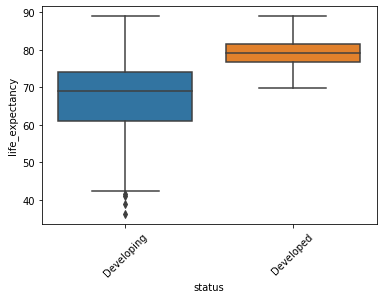

In [3]:
var = 'status'
f, ax = plt.subplots()
fig = sns.boxplot(x=var, y="life_expectancy", data=df)
xt = plt.xticks(rotation=45)

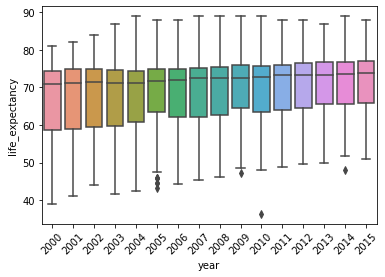

In [4]:
var = 'year'
f, ax = plt.subplots()
fig = sns.boxplot(x=var, y="life_expectancy", data=df)
xt = plt.xticks(rotation=45)

In [5]:
immunization  = df[['hepatitis_b', 'polio', 'diphtheria', 'life_expectancy']]
immunization.head()

,hepatitis_b,polio,diphtheria,life_expectancy
0,65.0,6.0,65.0,65.0
1,62.0,58.0,62.0,59.9
2,64.0,62.0,64.0,59.9
3,67.0,67.0,67.0,59.5
4,68.0,68.0,68.0,59.2


### Govt's Healthcare Expenditure Rate and People's Life Expectancy

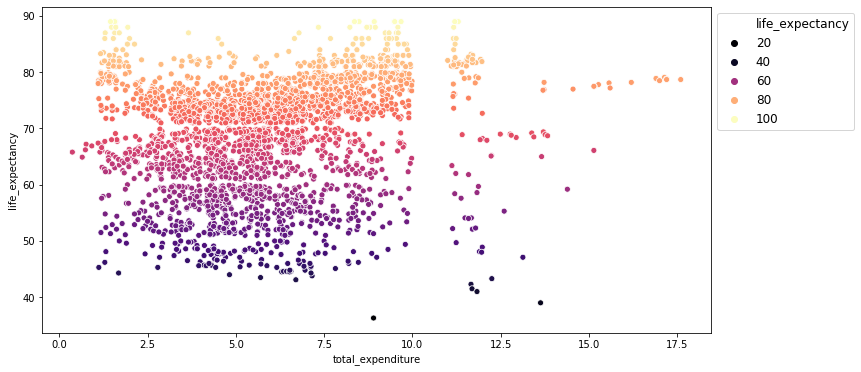

In [6]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='total_expenditure',y='life_expectancy', hue='life_expectancy',data=df, palette='magma')
plt.legend(fontsize= 'large', loc = 'best', bbox_to_anchor=(1, 1))
#plt.title(" Relationship of Govt's Healthcare Expenditure Rate and People's Life Expectancy")
plt.show()

**- A large portion of the dataset suggests that approximately 10% of expense implies an average life expectancy of 80 years.**

**- Couple of 90 years life expectancy are observed where the healthcare expense rates are ~1% and ~8.5%.**

**- Bimodal distribution-- most of the data are primarily concentrated near expense rate = 10%, life expectancy = 80 and another set of data are seen where expense rate = 2.5%, life expectancy = 82.**


### Realtionship of Life Expectancy and Human Development Index, GDP and Education

<Figure size 432x288 with 0 Axes>

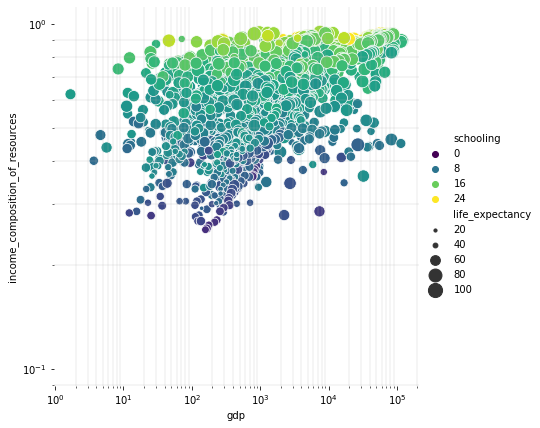

In [7]:
plt.figure()
g = sns.relplot(
    data=df,
    x="gdp", y="income_composition_of_resources",
    hue="schooling", size="life_expectancy", sizes=(10, 200), palette = 'viridis', height=6)

g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

**- More years spent in the school implies higher life expectancy.**

**- GDP of the people/countries are mostly distributed around USD 1000.**

**- Some people spent around 24 years in the school.**

### Relationship of Life Expectancy with Mortality Rates

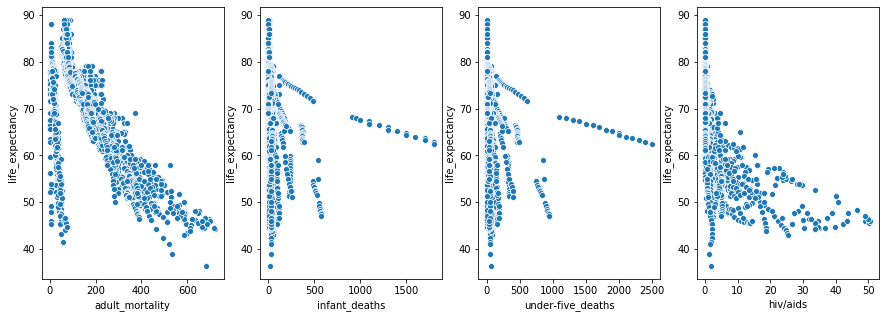

In [8]:
adult_infant_mortality = df[['adult_mortality', 'infant_deaths', 'under-five_deaths', 'hiv/aids', 'life_expectancy']]

plt.figure(figsize=(15,5))
plt.title("Relationship of Life Expectancy with Mortality Rates")

ax1=plt.subplot(141)
sns.scatterplot(data=adult_infant_mortality , x="adult_mortality", y="life_expectancy", ax = ax1)
ax2=plt.subplot(142)
sns.scatterplot(data=adult_infant_mortality , x='infant_deaths', y="life_expectancy", ax = ax2)
ax3=plt.subplot(143)
sns.scatterplot(data=adult_infant_mortality , x='under-five_deaths', y="life_expectancy", ax = ax3)
ax4=plt.subplot(144)
sns.scatterplot(data=adult_infant_mortality , x='hiv/aids', y="life_expectancy", ax = ax4)


**- Apparently, high mortality rate implies poor healthcare system and thus shorter life expectancy.**

### Relationship of Life Expectancy with Immunization Coverage

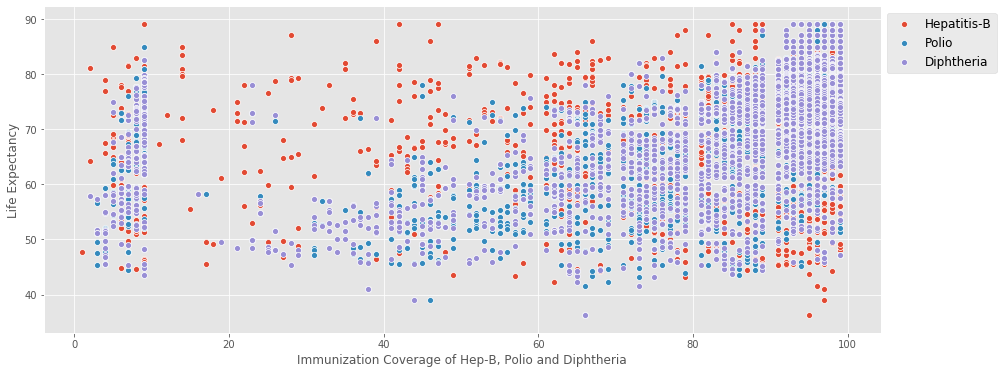

In [9]:
plt.figure(figsize=(15, 6))
plt.style.use('ggplot')

palette = sns.color_palette("mako_r", 6)

ax = sns.scatterplot(data=df , x='hepatitis_b', y="life_expectancy", label = 'Hepatitis-B')
ax1 = sns.scatterplot(data=df , x='polio', y="life_expectancy", ax = ax,  label = 'Polio')
ax2 = sns.scatterplot(data=df , x='diphtheria', y="life_expectancy", ax = ax, label = 'Diphtheria')

#plt.title('Relationship of Immunization Coverage and Life Expectancy', fontsize= 'large')
plt.xlabel('Immunization Coverage of Hep-B, Polio and Diphtheria', fontsize= 'large')
plt.ylabel('Life Expectancy')
plt.legend(fontsize= 'large', loc = 'best', bbox_to_anchor=(1, 1))


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

**- Low rate of immunization coverages implies shorter life expectancy and vice versa.**

C:\Users\sumai\Anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'truncate'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


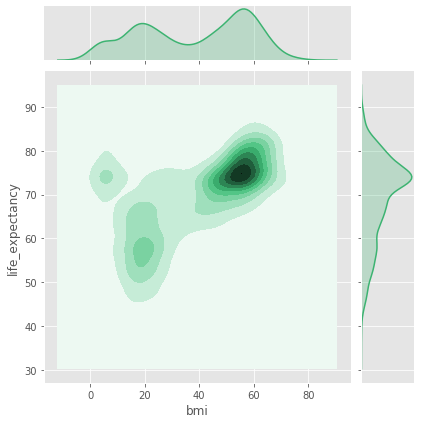

In [10]:
sns.jointplot(x= 'bmi', y="life_expectancy", data=df,kind="kde", truncate=False, color="mediumseagreen", height=6)

**- Most of the people have BMI around 55 and their apprximate life expectancy is 75 years.**

**- A smaller group of people have BMI between (0-30) and their apprximate life expectancy is 62 years.**

### Average Life Expectancy of the Developing and Develpoed Countries

Text(0, 0.5, 'Life Expectancy')

<Figure size 1440x432 with 0 Axes>

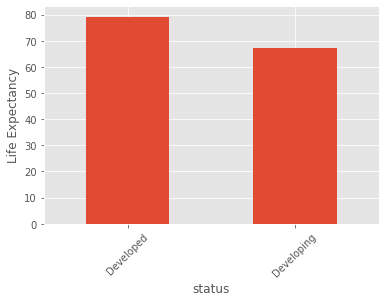

In [11]:
d = df[['status', 'life_expectancy']]

plt.figure(figsize=(20, 6))
#plt.style.use('ggplot')
fig, ax = plt.subplots()
d.groupby(['status']).mean()['life_expectancy'].plot(kind  = 'bar', ax=ax, rot= 45)

#plt.title('Average Life Expectancy of the Developing and Develpoed Countries', fontsize= 'large')
plt.ylabel('Life Expectancy')

**- The people of developed countries may live approximately 10 years longer than the people from developing countries.**

### Life Expectancy and Alcohol Consumption

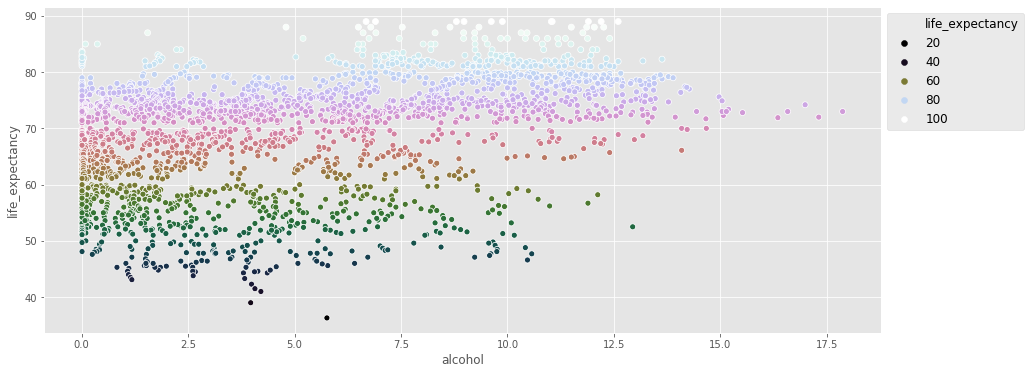

In [12]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='alcohol',y='life_expectancy', hue='life_expectancy',data=df, palette="cubehelix")
plt.legend(fontsize= 'large', loc = 'best', bbox_to_anchor=(1, 1))
plt.show()

**- Higher life expectancy (almost 90 years long) with average 8.5 liters of pure alcohol.**

**- A number of people drink less than 2.5 liters of alcohol and their average life expectancy is approximately 72 years.**

### How about Canadians?

In [13]:
df_canada = df[df.country == "Canada"]

### What is GDP's Role in the Life Expectancy of the Canadians?

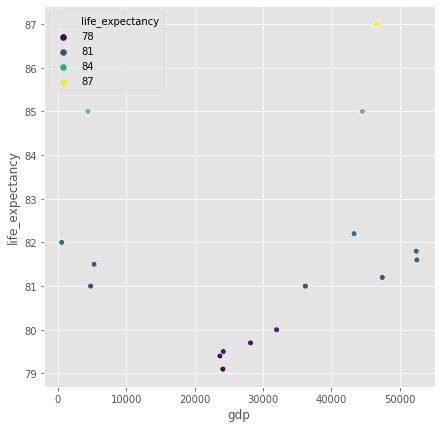

In [14]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='gdp', y='life_expectancy', hue='life_expectancy',data=df_canada, palette="viridis")
plt.show()

### How About Alcohol Consumption?

C:\Users\sumai\Anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'truncate'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


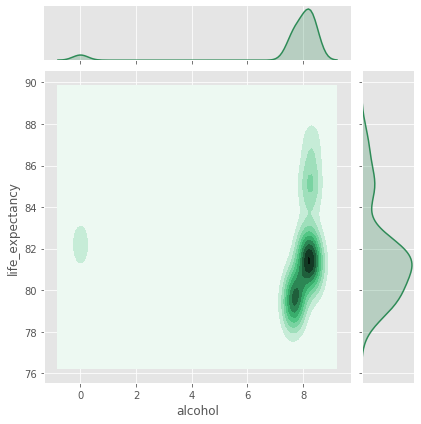

In [15]:
sns.jointplot(x= 'alcohol', y="life_expectancy", data=df_canada,kind="kde", truncate=False, color="seagreen", height=6)

### How Education and GDP contibute in Canadians' Average Life Expectancy Rate?

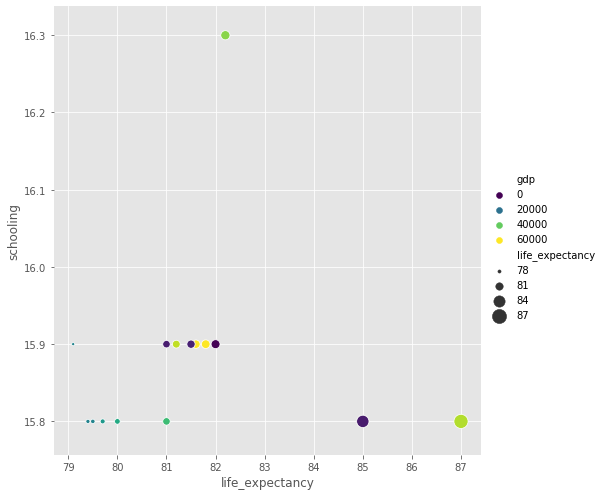

In [16]:
g = sns.relplot(
    data=df_canada,
    x="life_expectancy", y="schooling",
    hue="gdp", size="life_expectancy", sizes=(10, 200), palette = 'viridis', height = 7)

#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)